# Start from here 

In [5]:
# -- coding: utf-8 --
from sklearn import datasets
import  numpy as np
from PIL import Image
import os
import csv

from os.path import join as pjoin
from stat import ST_MODE, S_ISREG, S_ISDIR, S_ISLNK
from scipy import misc
 

'''Read 文件folder中的img msg，生成列表''' 
def generate_dataset(path):
#    print("\n.3)------------generate_dataset(path):--------------------\n")
    filelist = os.listdir(path)
    csvfile = open("imgfile1.txt", 'w')
    for files in filelist:
        filename = os.path.splitext(files)[0]
        str1 = path + files + ' ' + filename[0] + '\n'
        csvfile.writelines(str1)
    csvfile.close()
    return csvfile.name


''' 生成sklearn training data set(集)''' 
def load_imgesets(filename, basename,h, w):
#     print("\n.4)------------load_imgesets(base-path-name):--------------------\n")
    file = open(filename,'r')
    data = []
    target = []
    name =[]
    data = np.array(data,dtype=float)
    flag = 1
    for line in file:
        # split [img path] & [classes]
        str = line.split(' ',1)
        #read img & convert gray color
        #将 gray矩阵 convert to 一维 data
        if flag == 1:
            flag = 0            
#           print ("\n\n ------[load_imgeSets]----------**** \n\n"  ,misc.imresize( Image.open(str[0]).convert('L'),(h,w) ).shape,"\n\n ----------------**** \n\n" )
            data = np.array(misc.imresize( Image.open(str[0]).convert('L'),(h,w) )).reshape(1,-1)
        else:
            row = np.array(misc.imresize( Image.open(str[0]).convert('L'),(h,w) )).reshape(1,-1)
            #np.array(Image.open(str[0]).convert('L')).reshape(1, -1)
            data = np.row_stack((data, row))
        target.append(str[1])
        name.append(basename) 
    file.close()
    target =np.asarray(target,dtype=int)
    name =np.array(name)
#     print("\n.4-1)----------------data.shape, target.shape",data.shape,target.shape,type(data), type (target))
    return data,target,name

''' 
[Func]: 
read_dataPath(path , h, w ,nPer,bfSwitch )

[Desc]:
recursively descend the directory tree rooted at top,
calling the callback function for each regular file
    
[in-para]:
    1).path: real path
    2).h: height
    3).w: width
    4).nPer: total nums of people
    5).bfSwitch: just flag to on/off msg
[ret-para]:
    1).data (pic-nums=1200, dims=64*64=4096)
    2).target(pic-labels= 1200)
    3).name (pic-names=1200)
'''
def fetch_people_datasets(path , h, w ,nPer ,bfSwitch):   
    filelist = os.listdir(path)     
    tmpCount = 0    
    data = []
    target = []
    data1=[]
    target1=[]
    name=[]
    name1=[]  
        
    if(bfSwitch==False):   
        print("\n.1)------------image_datasets:--------------------\n")
        
    for f in filelist :
        pathname = os.path.join(path, f)
        mode = os.stat(pathname)[ST_MODE]
        if S_ISDIR(mode):
            # It's a directory, recurse into it
            #print("\n.2-1).---------\n",pathname) 
            
            if(tmpCount % 100 == 0):                
                print("\n.2)------------read_dataPath   (pathname+f):--------------------\n" , pathname )
                print("\n.3)------------generate_dataset(path):--------------------")
                print("\n.4)------------load_imgesets(f):-----------------------\n")
            
            filename = generate_dataset(pathname+"/")
            data,target,name = load_imgesets(filename , os.path.basename(pathname), h, w)
            #np.concat --> dat1 concat data
            data1 = np.append(data1,data) 
            target1=np.append(target1,target)
            
            name1=np.append(name1,name)
            #recursive read all folder until empty
            if(tmpCount >= (int(nPer)-1)):
                break;
            tmpCount=tmpCount+1
            if(tmpCount % 100 == 0):                        
                print ("\n\n\n----------------------------------------------------------",
                       "\n.1-1)Start------[read_dataPath]--------------------------- \n\nCounter: " ,
                       tmpCount,"\n\n.1-1)End------[read_dataPath]-----------------------------")          
            fetch_people_datasets(pathname, h, w ,nPer, True)
#         elif S_ISREG(mode):
#             name.append(os.path.basename(path))
#         else:
#             # Unknown file type, print a message
#             print('Skipping pathname:[%s] ' % pathname)     
    
    data1 = np.reshape(data1, (-1,h*w)) 
    return data1,target1,name1


In [6]:
    # -- coding: utf-8 -- 
    #path: "/home/..." , resolution : w:64  h:64 , nPer: 25 persons 
    db1="./casia_part"
    db2="/home/gilbert0/Documents/2017-12-13-AI/icyface_offline/data/CASIA-WebFace/"
    X, y, z = fetch_people_datasets(db1, 64, 64, 25, False)    
    n_samples, n_features = X.shape
    
    print("n_samples: {}".format(n_samples))
    print("n_features: {}".format(n_features))

    print(len(set(list(z))))
    print(set(list(z)))


.1)------------image_datasets:--------------------


.2)------------read_dataPath   (pathname+f):--------------------
 /home/gilbert0/Documents/2017-12-13-AI/icyface_offline/data/CASIA-WebFace/2649909

.3)------------generate_dataset(path):--------------------

.4)------------load_imgesets(f):-----------------------



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


n_samples: 1024
n_features: 4096
25
{'1559927', '0004894', '2194827', '0000582', '1817240', '0768154', '0002800', '0095746', '2924523', '0818331', '0856387', '0001942', '1133714', '3131306', '2649909', '1265239', '0032375', '0492924', '0664238', '2288842', '1013003', '2185462', '1348102', '0794269', '2210709'}


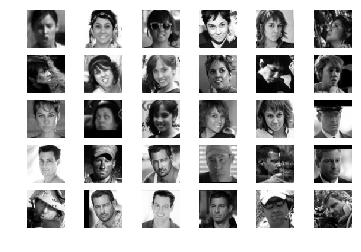

In [7]:
import pylab as pl
if True:
    for i in range(30):  
        face = X[i]
        pl.subplot(5, 6, i + 1)
        pl.imshow(face.reshape((64, 64)),cmap="gray")
        pl.axis('off')        
#       pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
#       imshow(face, cmap='gray') 

(-0.5, 63.5, 63.5, -0.5)

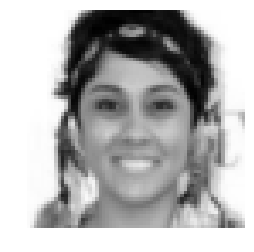

In [8]:
# from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from scipy import misc 
im1 = X[1] 
plt.imshow(  im1.reshape (64,64)  ,cmap="gray" )
plt.axis('off') 